# Convolution Neural Network avec Keras

In [1]:
import os
import cv2
# si nécessaire : conda install -c conda-forge opencv   
# ou sinon : https://pypi.org/project/opencv-python/
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

On importe les librairies nécessaires de Keras

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam, Adadelta
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


# Importation et préparation des données

Adresse du dossier où sont entreposées les données:

In [3]:
data_path = "C:/Users/91970/Documents/MASTERS/YEAR 2/app stat/TP/tp6/data_animals"

La fonction `os.listdir()` permet de lister le contenu du dossier `data_animals` (un repertoire par classe).

In [4]:
data_dir_list = os.listdir(data_path)
print(data_dir_list)
num_classes = len(data_dir_list) 
print(num_classes)

['cats', 'dogs', 'horses', 'Humans']
4


Toutes les images ne sont pas au même format (nb de pixels).
Le réseau CNN impose que toutes les données aient la même dimension. Il nous faudra  transfomrer les images pour qu'elles soient toutes au même format : 128x 128.

In [5]:
img_rows=128
img_cols=128

Nous n'allons utiliser ici qu'un seul canal:

In [6]:
num_channel=1

> Compléter le script ci-dessous pour importer les images sous la forme de tableaux 128x128 dans la liste img_data_list.
*  `my_img = cv2.imread("file")`  : lecture d'un fichier image
*  `cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)` : convertit le fichier image en niveaux de gris
*  `cv2.resize(input_img,(n,p))` : redimensionne l'image au format n x p 

In [7]:
from sklearn import preprocessing

img_data_list=[]

for dataset in data_dir_list: # boucle sur les 4 repertoires
    img_list=os.listdir(data_path+'/'+ dataset)  # 
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img_raw=  cv2.imread( data_path + '/' + dataset+ '/' + img)
        input_img_grey= cv2.cvtColor(input_img_raw, cv2.COLOR_BGR2GRAY)
        input_img_flatten=cv2.resize(input_img_grey,(128,128)).flatten()
        img_data_list.append(input_img_flatten)

        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
print (img_data.shape)
img_data_scaled = preprocessing.scale(img_data)
print (img_data_scaled.shape)

print (np.mean(img_data_scaled))
print (np.std(img_data_scaled))

print (img_data_scaled.mean(axis=0))
print (img_data_scaled.std(axis=0))  

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-horses

Loaded the images of dataset-Humans

(808, 16384)


C:\Users\91970\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\91970\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(808, 16384)
7.487465e-09
1.0000005
[-1.3735625e-07 -6.5063489e-08  6.2702910e-08 ...  1.3278262e-08
 -1.1802900e-07  1.7261740e-08]
[1.0000008  0.99999976 1.         ... 0.9999998  1.0000005  1.0000005 ]


> Quelle la dimension du tableau `img_data.shape` ?

In [8]:
img_data.shape

(808, 16384)

La première couche du réseau de convolution  prend en entrée un tableau de dimension 3 : (hauteur, largeur, profondeur) où la profondeur correspond aux nombres de canaux (ici 1).

Avec Tensor Flow (ici en backend) la profondeur sera donnée en dernière position. 

Nous redimensionnons les données pour y ajouter la dimension de profondeur (en réalité inutile pour nos données qui sont ici en niveaux gris).

In [9]:
img_data_scaled=img_data_scaled.reshape(img_data.shape[0],
                                        img_rows,img_cols,
                                        num_channel)
print (img_data_scaled.shape)
img_data = img_data_scaled

(808, 128, 128, 1)


Nous indiquons maintenant les labels des images:

In [10]:
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3

names = ['cats','dogs','horses','humans']
N=np.asarray(names)

> Convertir les labels en "one-hot encoding"

In [11]:
labels_one_hot=to_categorical(labels)

> Séparer  les données en train / test (0.8-0.2).

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(img_data, labels_one_hot, train_size=0.8, random_state=1)

# Définition de l'architecture du modèle

Nous définissons ci-dessous les deux premiers niveaux de convolution du réseau convolutionnel.
Chacune de ces deux couches est définie comme suit :
+ 32 noyaux (filtres)
+ Pas (stride) = 1
+ Kernel size = (3,3)
+ padding = 'same' (i.e. 0 padding : bordures à 0)
+ activation : relu

> Créer un modèle séquentiel composé de 4 couches succesives (conv + relu + conv + relu). Voir  [ici](https://keras.io/layers/convolutional/#conv2d) et  [ici](https://keras.io/examples/cifar10_cnn/) pour la synthaxe de la couche de convolution `Conv2D`.

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same'))
model.add(Activation('relu'))

> Executez les codes ci-dessous et decrire les sorties obtenues

In [14]:
print(model.layers[0].input_shape)
print(model.layers[1].input_shape)

(None, 128, 128, 1)
(None, 128, 128, 32)


(`batch_size`,`n_l`,`n_c`,`nb de canaux`)

En pratique on laisse Keras dimensionner correctement les couches en fonction du `batch_size`.
Noter que l'on peut néanmoins dimensionner "à la main" une couche en fonction de la taille du batch. 

> Passer `batch_size=16` en argument de `Conv2D()` et vérifier les dimension de la couche cachée.

In [15]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), strides=1, padding='same', batch_size = 16, input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))

print(model1.layers[0].input_shape)

(16, 128, 128, 1)


> Executez les codes ci-dessous et decrire les sorties obtenues. Expliquer en particulier la dimension de la troisième couche en utilisant `get_weights()`.

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 32)      0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [17]:
np.shape(model.layers[2].get_weights()[0])

(3, 3, 32, 32)

Multichannel convolution:
\begin{eqnarray} Z(i,j,l) &= & ( V \star K ) (i,j,l) \\
& =  & \sum_{u,v,w}   V (i+u, j+v,w ) w_{u,v,l,w} $$ 
where 
+ $V$  and $Z$ have the same dimensions (multichannel).
+ $K(u,v,l,w) $ gives the connection strength between a unit in channel $l$ of the output and a unit in channel $w$ of the input, with an offset of  $u$ rows and $v$ columns between the output unit and the input unit.

In [ ]:
?

> Vérifier que les poids sont (déjà) initialisés aléatoirement alors que les biais sont initialisés à 0. 

In [18]:
print(model.layers[0].get_weights())

[array([[[[ 1.79685652e-02,  1.21585205e-01,  7.11981505e-02,
           1.27387211e-01, -1.33042857e-01, -2.15949789e-02,
          -5.04030138e-02, -1.33793801e-01, -4.14319187e-02,
           1.18558630e-01,  9.77788419e-02,  1.36746064e-01,
           8.75504166e-02, -1.27179131e-01, -6.44061789e-02,
          -1.22730434e-01, -1.08301640e-04,  1.24166235e-01,
          -1.37607992e-01, -6.95706829e-02, -2.26895735e-02,
          -7.29372501e-02, -1.32182807e-01, -1.31454766e-01,
          -7.15542063e-02, -1.05049759e-02, -1.88599974e-02,
           1.38848469e-01, -6.41238689e-02,  9.23047215e-02,
           1.38784125e-01,  6.90263808e-02]],

        [[ 1.33709565e-01, -2.31244192e-02, -1.35899261e-01,
          -1.35293052e-01,  3.68277431e-02,  4.18093950e-02,
          -1.18600547e-01,  4.76335734e-02,  4.93636727e-03,
          -7.90888593e-02, -2.46691033e-02,  8.78196210e-02,
           4.99052852e-02, -6.14750981e-02,  8.86815190e-02,
           4.62177545e-02,  1.0839249

> Construire l'architecture complète du réseau  :
+ Une convolution à 32 filtres de taille (3,3), zero padding
+ Relu activation
+ Une convolution à 32 filtres de taille (3,3), zero padding
+ Relu activation
+ Maxpooling2D (2,2) [documentation](https://keras.io/layers/pooling/#maxpooling2d)
+ Dropout(0.5) [documentation](https://keras.io/layers/core/#dropout)
+ Une convolution à 64 filtres de taille (3,3), zero padding
+ Maxpooling2D (2,2) 
+ Dropout(0.5) 
+ Flatten  [documentation](https://keras.io/layers/core/#flatten)
+ Dense(64)
+ Relu activation
+ Dropout(0.5)
+ Dense(4)
+ Softmax
Afficher un résumé de l'architecture avec model.summary()  
Créer un diagramme de l'architecture avec 

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=X_train.shape[1:])) #bien une 2D?
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_4 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
activation_5 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
____

# Apprentissage

> Entreiner le modèle avec la méthode sgd (learning rate de 0.01 et momentum de 0.9) puis avec la méthode adam.

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10) 

sgd = SGD(lr=0.01, momentum=0.9) 

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',metrics = ['accuracy'] )

history = model.fit(X_train, Y_train,epochs=100,
          batch_size=20,verbose=1,
          validation_split=0.1,
          callbacks=[early_stopping])

from keras import optimizers

Adm = optimizers.Adam(0.0005) 

model.compile(optimizer=Adm,
              loss='categorical_crossentropy',metrics = ['accuracy'] )

history1 = model.fit(X_train, Y_train,epochs=100,
          batch_size=20,verbose=1,
          validation_split=0.1,
          callbacks=[early_stopping])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 581 samples, validate on 65 samples
Epoch 1/100
581/581 [==============================] - 14s 25ms/step - loss: 1.4002 - acc: 0.2874 - val_loss: 1.6152 - val_acc: 0.1846
Epoch 2/100
581/581 [==============================] - 16s 27ms/step - loss: 1.3951 - acc: 0.2599 - val_loss: 2.7199 - val_acc: 0.1846
Epoch 3/100
581/581 [==============================] - 15s 26ms/step - loss: 1.3280 - acc: 0.3356 - val_loss: 1.3893 - val_acc: 0.1846
Epoch 4/100
581/581 [==============================] - 18s 30ms/step - loss: 1.3274 - acc: 0.3236 - val_loss: 1.2963 - val_acc: 0.3385
Epoch 5/100
581/581 [==============================] - 17s 29ms/step - loss: 1.2920 - acc: 0.3666 - val_loss: 1.3307 - val_acc: 0.3692
Epoch 6/100
581/581 [==============================] - 15s 26ms/step - loss: 1.2259 - acc: 0.3924 - val_loss: 1.0794 - val_acc: 0.6000
Epoch 7/100
581/581 [=============================

> Tracer en fonction du nb d'epoch le risque de cross-entropy ainsi que la précision pour les échantillons d'apprentissage et de validation.

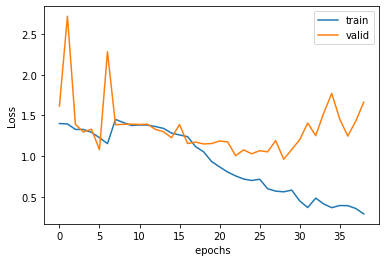

In [52]:
plt.plot(history.history['loss']+history1.history['loss'],label ="train")
plt.plot(history.history['val_loss']+history1.history['val_loss'],label ="valid")
plt.xlabel(' epochs')
plt.ylabel('Loss')
plt.legend();

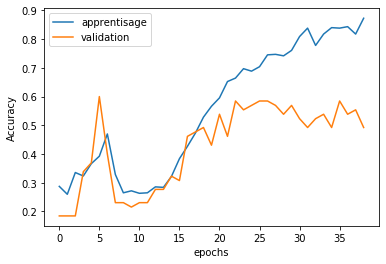

In [22]:
plt.plot(history.history['acc']+history1.history['acc'],label ="apprentisage")
plt.plot(history.history['val_acc']+history1.history['val_acc'],label ="validation")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

> Donner le risque de cross-entropy ainsi que la précision pour l' échantillon de test.

In [23]:
score = model.evaluate(X_test, Y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

162/162 [==============================] - 1s 6ms/step
Test Loss: 1.6367140817053525
Test accuracy: 0.5


# Matrice de confusion

> En utilisant les outils `classification_report()` et `confusion_matrix()` de `sklearn.metrics` pour décrire les performances du réseau de neurones. Vous afficherez notamment la matrice de confusion, comme proposé [ici](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py).

162/162 [==============================] - 1s 4ms/step
[[0.52777778 0.27777778 0.19444444 0.        ]
 [0.36842105 0.26315789 0.36842105 0.        ]
 [0.14893617 0.10638298 0.70212766 0.04255319]
 [0.2195122  0.09756098 0.2195122  0.46341463]]
              precision    recall  f1-score   support

        cats       0.39      0.53      0.45        36
        dogs       0.34      0.26      0.30        38
      horses       0.52      0.70      0.60        47
      humans       0.90      0.46      0.61        41

    accuracy                           0.50       162
   macro avg       0.54      0.49      0.49       162
weighted avg       0.55      0.50      0.50       162



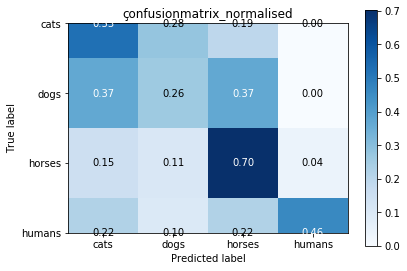

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict_classes(X_test, batch_size=32, verbose=1)
cr= classification_report([Y_test[i].argmax() for i in range(len(Y_test))],Y_pred, target_names=names)

cm=confusion_matrix([Y_test[i].argmax() for i in range(len(Y_test))], Y_pred)
cm=cm.astype('float') / cm.sum(axis=1).reshape(-1,1)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
yticks=np.arange(cm.shape[0]),
xticklabels=names, yticklabels=names,
title="çonfusionmatrix_normalised",
ylabel='True label',
xlabel='Predicted label')
fmt = '.2f' 
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
print(cm)
print(cr)


# Sauvegarde de votre modele

In [38]:
from keras.models import model_from_json
from keras.models import load_model

En informatique, la sérialisation (de l'anglais américain serialization) est le codage d'une information sous la forme d'une suite d'informations plus petites (dites atomiques) pour, par exemple, sa sauvegarde (persistance) ou son transport. L'activité symétrique, visant à décoder cette suite pour créer une copie conforme de l'information d'origine, s'appelle la désérialisation.

##### Sauvegarde du modèle (architecture seule) en json

JavaScript Object Notation (JSON) est un format de données textuelles dérivé de la notation des objets du langage JavaScript. Il permet de représenter de l’information structurée.

Un document JSON a pour fonction de représenter de l'information accompagnée d'étiquettes permettant d'en interpréter les divers éléments, sans aucune restriction sur le nombre de celles-ci.

Un document JSON ne comprend que deux types d'éléments structurels :
+ Des ensembles de paires "nom" (alias "clé") / "valeur" ;
+ Des listes ordonnées de valeurs.

In [39]:
# format JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
   

In [34]:
print(model_json)

{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_4", "trainable": true, "batch_input_shape": [null, 128, 128, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Activation", "config": {"name": "activation_4", "trainable": true, "dtype": "float32", "activation": "relu"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_5", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1

##### Sauvegarde des poids du modele en HDF5

Le Hierarchical Data Format (HDF) est un ensemble de formats de fichiers permettant de sauvegarder et de structurer des fichiers contenant de très grandes quantités de données. Un fichier HDF est un conteneur de fichiers.

In [35]:
# serialization des poids en format HDF5
model.save_weights("model.hdf5")

Pour mémoire :

In [40]:
model.layers[0].get_weights()[0][:,:,0,0]

array([[-0.25403416, -0.2504987 , -0.23143263],
       [-0.14835459, -0.12126884, -0.22364259],
       [-0.03677136, -0.10693093, -0.2025215 ]], dtype=float32)

##### Chargement du modèle et intégration des poids enregistrés

On charge maintenant les poids prcécedemment entrainés pour ce modèle:

In [41]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [42]:
loaded_model = model_from_json(loaded_model_json)

In [43]:
loaded_model.layers[0].get_weights()[0][:,:,0,0]

array([[-0.09693556, -0.06782392,  0.13073419],
       [-0.02686558,  0.07402426, -0.13712604],
       [ 0.11445595, -0.09400173, -0.13242994]], dtype=float32)

In [44]:
loaded_model.load_weights("model.hdf5")

In [45]:
loaded_model.layers[0].get_weights()[0][:,:,0,0]

array([[-0.00047676, -0.11701082,  0.1616046 ],
       [ 0.01457135, -0.04943353,  0.09972926],
       [-0.11757717, -0.08177207, -0.03403373]], dtype=float32)

##### Sauvegarde et chargement du modèle entrainé en HDF5

In [46]:
model.save('model.hdf5')

In [47]:
loaded_trained_model=load_model('model.hdf5')

In [48]:
loaded_trained_model.layers[0].get_weights()[0][:,:,0,0]

array([[-0.25403416, -0.2504987 , -0.23143263],
       [-0.14835459, -0.12126884, -0.22364259],
       [-0.03677136, -0.10693093, -0.2025215 ]], dtype=float32)

Le modèle est pret à l'emploi :

In [49]:
score = loaded_trained_model.evaluate(X_test, Y_test)

162/162 [==============================] - 1s 4ms/step


In [50]:
print(score)

[1.6367140817053525, 0.5]
